## Tokens
We breifly mentioned the word token in the last section, where I described it as a word. In some cases this is true, in others not. A token is a single unit, or piece of information. Typically in NLP we will find that models consume a token, which can represent a multitude of different things, such as:

- A word
- Part of a word
- A single character
- Puntuation mark [,!-.]
- Special token like \<URL>, or \<NAME>
- Model-specific special tokens, like [CLS] and [SEP] for BERT

Taking our previous tweet example, we can split it into word tokens using the split method:

In [2]:
tweet = """I’m amazed how often in practice, not only does a @huggingface NLP model solve your problem, but one of their public finetuned checkpoints, is good enough for the job.

Both impressed, and a little disappointed how rarely I get to actually train a model that matters :("""

tweet.split()

['I’m',
 'amazed',
 'how',
 'often',
 'in',
 'practice,',
 'not',
 'only',
 'does',
 'a',
 '@huggingface',
 'NLP',
 'model',
 'solve',
 'your',
 'problem,',
 'but',
 'one',
 'of',
 'their',
 'public',
 'finetuned',
 'checkpoints,',
 'is',
 'good',
 'enough',
 'for',
 'the',
 'job.',
 'Both',
 'impressed,',
 'and',
 'a',
 'little',
 'disappointed',
 'how',
 'rarely',
 'I',
 'get',
 'to',
 'actually',
 'train',
 'a',
 'model',
 'that',
 'matters',
 ':(']

This is the rawest form of word-level tokens, the alternative to word-level is character-level, which looks like this:



In [4]:
[char for char in tweet][:5]

['I', '’', 'm', ' ', 'a']

The 'advantage' of using character-level embeddings is that any models we train on this data will only need to remember all of the characters of the alphabet, punctuation characters, and spaces/newlines. So the model vocabulary (list of all the tokens it knows) is very small. Additionally if a new word appears outside of training, the model will still be able to digest it - whereas a word-level embedding model would not understand the new word and replace it with an unknown token (more on this soon).

It's not all good news for character-level embeddings though. Words carry a significant level of semantic meaning, and when we use character-level embedding this is mostly lost. At a high-level we can view character-level embedding as being good for syntax, and word-level embedding as being better for semantics. Although, in-reality, word-level embeddings almost always outpeform character-level embeddings.

Back to word-level embeddings, we will often find with the latest transformer models that text can be split into part-word tokens. So for example, we may find that the word 'being' is split into the tokens ["be", "-ing"], or 'amazingly' to ["amaz", "-ing", "-ly"].

In addition to this, we typically seperate punctuation too, so in our previous example the tokens '@huggingface' and 'impressed,' would become ["@", "huggingface"] and ["impressed", ","] respectively.

In our tweet we might want to find any token that begins with @ and convert that token to \<USER>, a unique token that we have specified to identify usernames in our tweets. This rule is logical as there are potentially millions of added tokens in our model if we include Twitter usernames, but the username doesn't tell our model anything about the meaning in the language of the text, for example:

@elonmusk thinks that the NLP models that @joebloggs made are super cool

Has no real meaningful difference to our model as with:

@joebloggs thinks that the NLP models that @huggingface made are super cool

The meaning and subsequent classification of both tweets should really be identical in our model. So, it is logical to replace usernames with a single shared token. This approach is something that is commonly used for many different things such as:

- emails
- names/usernames
- URLs
- monetary values
- or any other numbers

But ofcourse we don't always want to do this for everything, this is simply a rough guide as to what we may want to tokenize.

Finally, we also need to understand model-specific special tokens. We will do this with an example.

For the BERT transformer model there are five special tokens that are used by the model, these are:

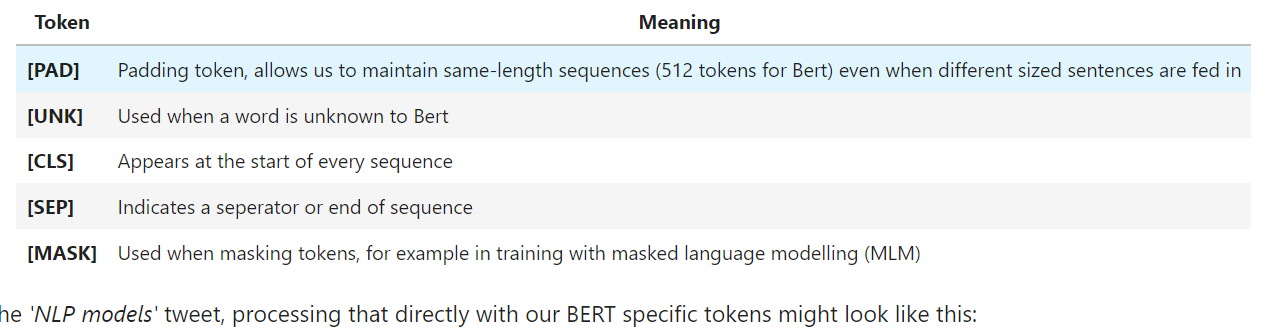

So if we take the 'NLP models' tweet, processing that directly with our BERT specific tokens might look like this:

['[CLS]', '[UNK]', 'thinks', 'that', 'the', 'nlp', 'models', 'that', '[UNK]', 'made', 'are', 'super', 'cool', '[SEP]', '[PAD]', '[PAD]', ..., '[PAD]']
Here, we have:

- Applied [CLS] token to indicate the start of the sequence.
- Both username tokens @elonmusk and @joebloggs were not 'known' words to BERT so BERT replaced them with unknown tokens [UNK], alternatively we could have replaced these with our own special user tokens.
- Added *[SEP] token to the end of our sequence.
- Padded the sequence upto the required length of 512 tokens (required due to fixed input sequence length of BERT model) using [PAD] tokens.

Different models will have different special tokens, but we will often that they are being used for similiar reasons.

That's everything on tokens for now, although we will cover tokenization in more depth (and the code too) for different models in later notebooks.